In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from io import StringIO
import plotly.express as px

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers.csv to Mall_Customers.csv
User uploaded file "Mall_Customers.csv" with length 3981 bytes


In [ ]:
raw_data = uploaded["Mall_Customers.csv"]
dataset = pd.read_csv(StringIO(raw_data.decode('utf-8')))
dataset.columns = ["id", 'gender', 'age', 'income', 'score']
data = dataset # Smaller reference

In [ ]:
dataset.head()

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.columns, dataset.shape

(Index(['id', 'gender', 'age', 'income', 'score'], dtype='object'), (200, 5))

In [ ]:
dataset.isna().any()

id        False
gender    False
age       False
income    False
score     False
dtype: bool

# Encoding/Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

dataset["gender"] = encoder.fit_transform(dataset["gender"])
print(dataset["gender"])

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: gender, Length: 200, dtype: int64


In [ ]:
# Make sure Pandas Profiler is updated (Older versions cause problems)
!pip install --upgrade pandas_profiling

     |████████████████████████████████| 245kB 8.5MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 3.2MB 11.2MB/s 
     |████████████████████████████████| 1.1MB 30.6MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 296kB 45.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=42a860f6c837484abd8972a038a71d875ad83370587db3a05aaaf2914638f760
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=452fea7bf0b827dde5fe0c6d2125df2aad5fe9ab5f3967459012065a8f8b38b5
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but y

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset)

In [ ]:
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

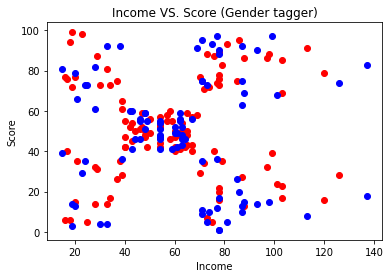

In [ ]:
# Checking to see if gender can introduce more correlation in data 
plt.scatter(data[data["gender"] == 0]["income"], data[data["gender"] == 0]["score"], color=['red'])
plt.scatter(data[data["gender"] == 1]["income"], data[data["gender"] == 1]["score"], color=['blue'])
plt.xlabel("Income")
plt.ylabel("Score")
plt.title("Income VS. Score (Gender tagger)")
plt.show()

# Clustering on Score, Income and Age

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score

colors = ["#43ff0c", "#e91d0c", "#00FFA6", "#00F7FF", "#951dd6", "#ff8332", "#D508FA", "#5d6d7e", "#9072cd"]
ks = (2, 3, 4, 5, 6, 7, 8, 9)
seeds = (7, 42, 7877)
silhouette_scores = {k:[] for k in ks}
inertias = {k:[] for k in ks}

SilhouetteScore: 0.293166070535953
SilhouetteScore: 0.293166070535953
SilhouetteScore: 0.293166070535953


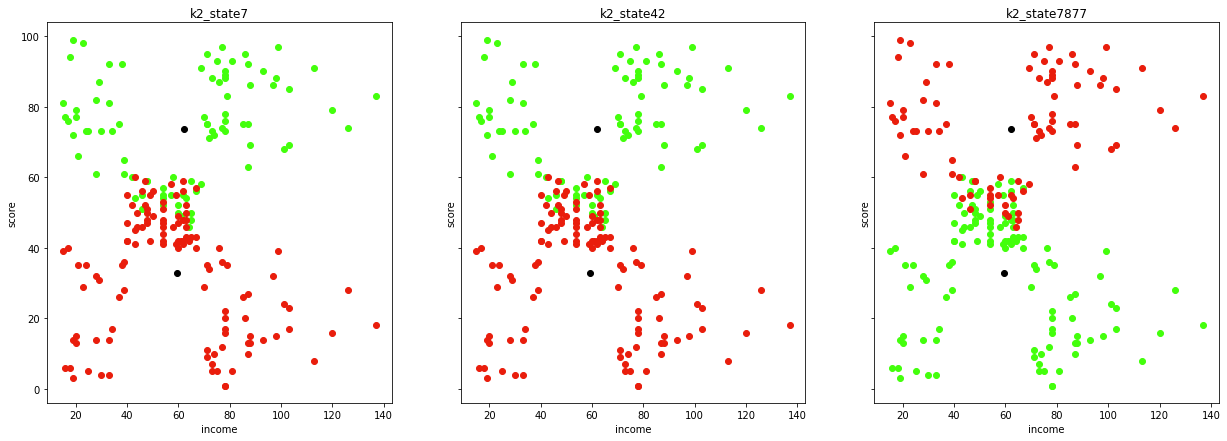

SilhouetteScore: 0.3839349967742105
SilhouetteScore: 0.3839349967742105
SilhouetteScore: 0.3839349967742105


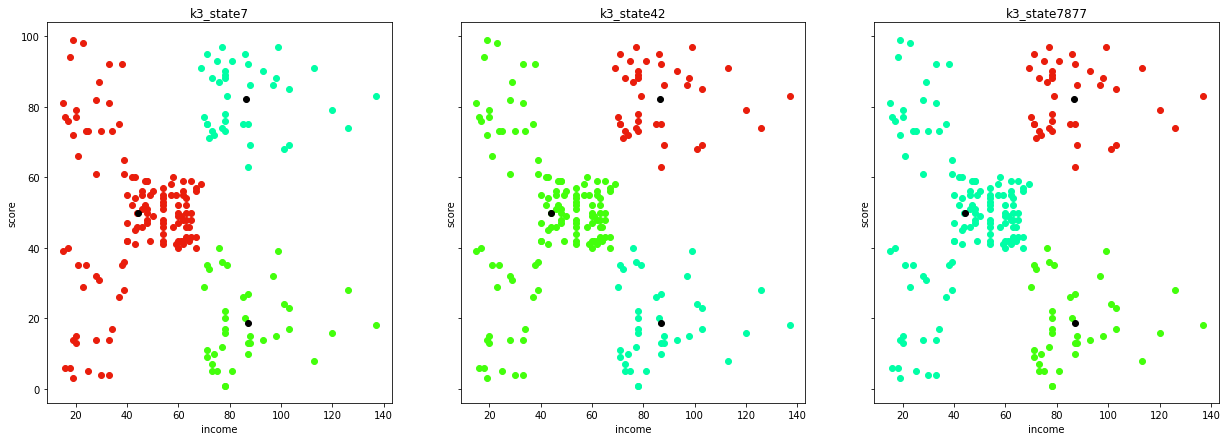

SilhouetteScore: 0.40546302077733304
SilhouetteScore: 0.40546302077733304
SilhouetteScore: 0.40546302077733304


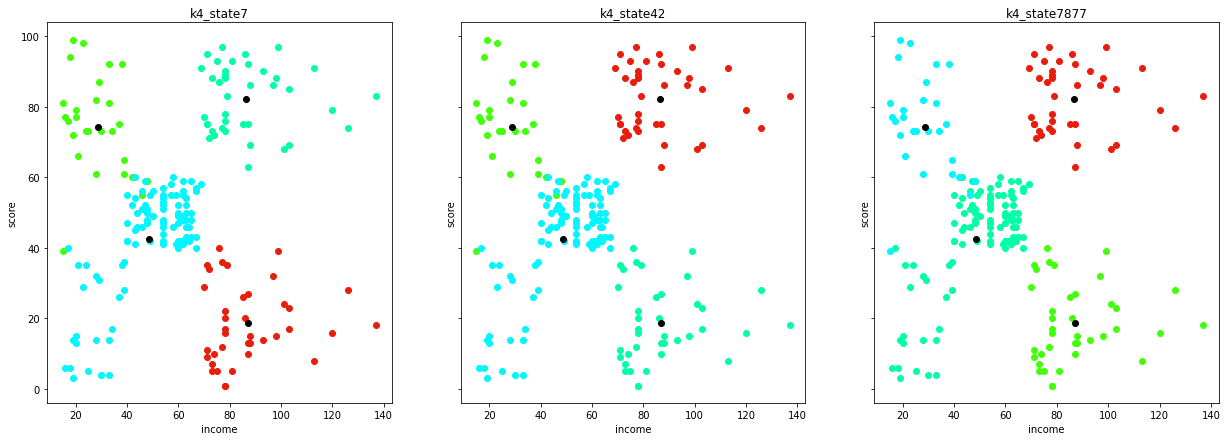

SilhouetteScore: 0.44428597560893024
SilhouetteScore: 0.44428597560893024
SilhouetteScore: 0.44364987032532566


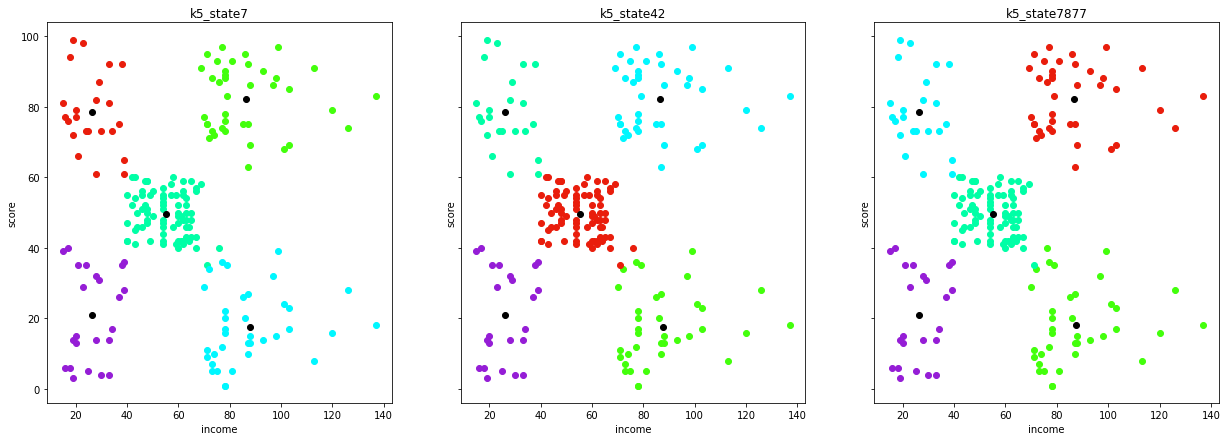

SilhouetteScore: 0.4523443947724053
SilhouetteScore: 0.4523443947724053
SilhouetteScore: 0.4523443947724053


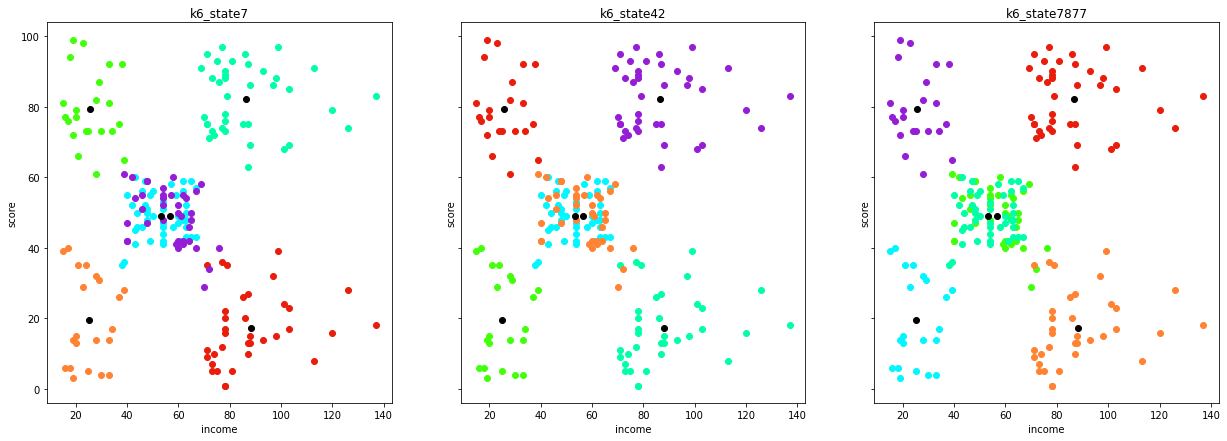

SilhouetteScore: 0.43883522027400007
SilhouetteScore: 0.4412807576186172
SilhouetteScore: 0.44125523526699084


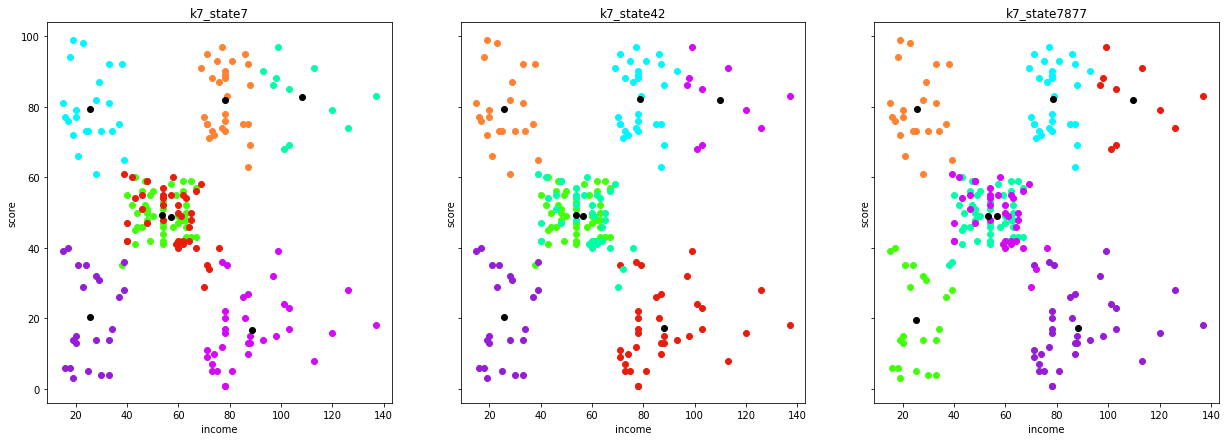

SilhouetteScore: 0.43365879903656934
SilhouetteScore: 0.42786362446871096
SilhouetteScore: 0.42786362446871096


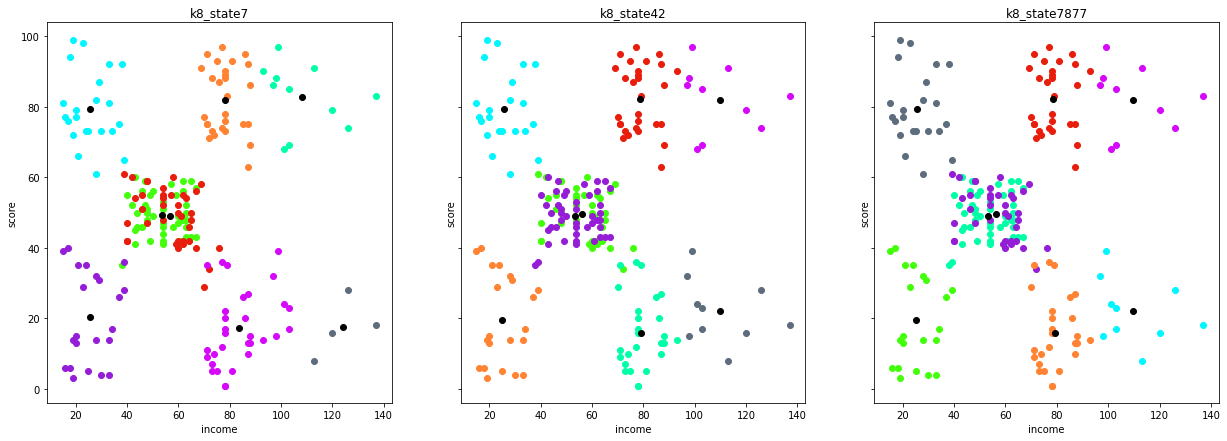

SilhouetteScore: 0.419316832618241
SilhouetteScore: 0.41528632942642596
SilhouetteScore: 0.4162118039040681


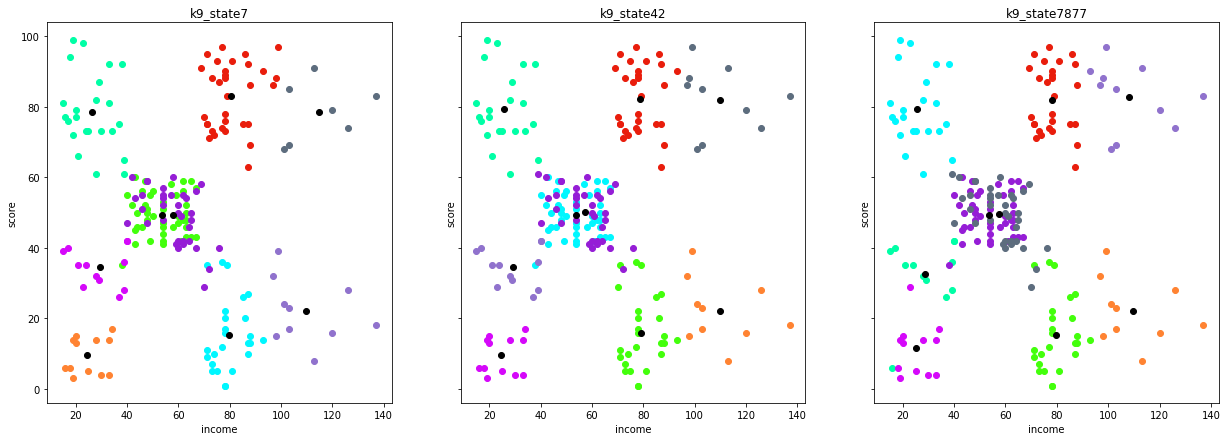

In [ ]:
for k in ks:
    # Initialize Subplots
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    fig.set_figheight(7); fig.set_figwidth(7*3)
    i = 0
    for state in seeds:
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=state).fit(dataset[["income", "score", "age"]])
        dataset["label"] = kmeans.labels_
        centers = kmeans.cluster_centers_
        for l in range(k):
            axs[i].scatter(data[data["label"] == l]["income"], data[data["label"] == l]["score"], color=[colors[l]])
        # Add more parameters to plots
        axs[i].scatter(centers[:, 0], centers[:, 1], color=["black"])
        axs[i].set_xlabel('income')
        axs[i].set_ylabel('score')
        axs[i].set_title(f"k{k}_state{state}")
        i += 1
        # Log and store in memory
        inertias[k].append(kmeans.inertia_)
        score = silhouette_score(dataset[["income", "score", "age"]], dataset["label"])
        silhouette_scores[k].append(score)
        print("SilhouetteScore:", score)
    # Show all scatter plots for current 'k'
    plt.show()

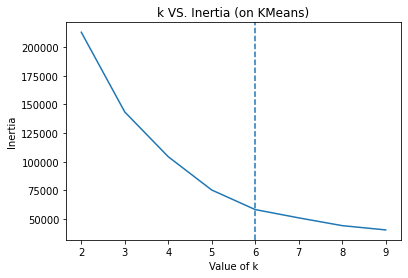

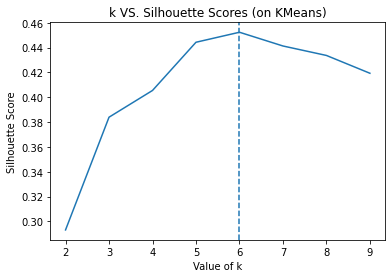

In [ ]:
# Plot inertias for every k
plt.plot(range(2, ks[-1]+1, 1), [min(inertias[k]) for k in ks])
plt.xlabel('Value of k')
plt.ylabel("Inertia")
plt.title("k VS. Inertia (on KMeans)")
# Calculate the point of inflection in inertia graph
inflection_point = 2
for i in ks[:-1]:
    m1, m2 = min(inertias[i]), min(inertias[i+1])
    if (m1 - m2) <= (m1 * 0.2): # When there is less than 20% change in next point
        inflection_point = i
        break
# Add inflection point to graph
plt.axvline(x=inflection_point, linestyle='--')
plt.show()


# Silhouette Score
# print(silhouette_scores)
plt.plot(range(2, ks[-1]+1, 1), [max(silhouette_scores[k]) for k in ks])
plt.axvline(x=6, linestyle='--')
plt.xlabel('Value of k')
plt.ylabel("Silhouette Score")
plt.title("k VS. Silhouette Scores (on KMeans)")
plt.show()

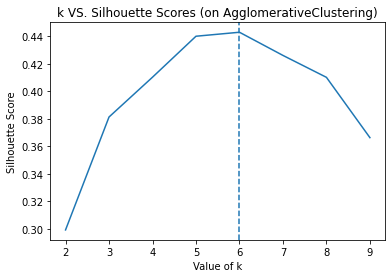

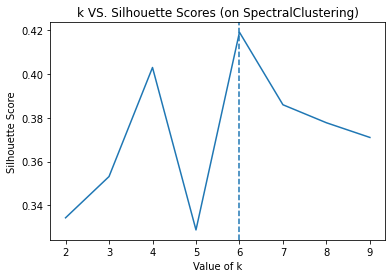

In [ ]:
# Experimenting with Agglomerative and Spectral Clustering

aglo_silhouette_scores = []
spec_silhouette_scores = []

for k in ks:
    model = AgglomerativeClustering(n_clusters=k).fit(data[["income", "score", "age"]])
    data["label"] = model.labels_
    aglo_silhouette_scores.append(silhouette_score(data[["income", "score", "age"]], data["label"]))

# Scaling data 
from sklearn.preprocessing import scale
scaled_data = data.copy()
scaled_data["age"] = scale(data["age"])
scaled_data["score"] = scale(data["score"])
scaled_data["income"] = scale(data["income"])

for k in ks:
    model = SpectralClustering(n_clusters=k).fit(scaled_data[["age", "score", "income"]])
    scaled_data["label"] = model.labels_
    spec_silhouette_scores.append(silhouette_score(scaled_data[["age", "score", "income"]], scaled_data["label"]))

plt.plot(range(2, ks[-1]+1, 1), aglo_silhouette_scores)
plt.axvline(x=6, linestyle='--')
plt.xlabel('Value of k')
plt.ylabel("Silhouette Score")
plt.title("k VS. Silhouette Scores (on AgglomerativeClustering)")
plt.show()

plt.plot(range(2, ks[-1]+1, 1), spec_silhouette_scores)
plt.axvline(x=6, linestyle='--')
plt.xlabel('Value of k')
plt.ylabel("Silhouette Score")
plt.title("k VS. Silhouette Scores (on SpectralClustering)")
plt.show()

In [ ]:
# As we can see both the Agglomerative and Spectral Clustering results produce 
# max silhouette scores at k == 6  

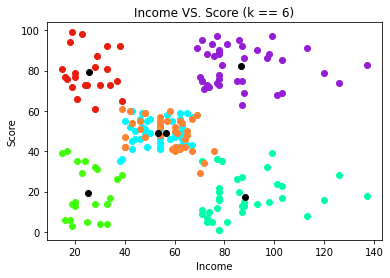

Color: #43ff0c Label: 0 Cluster points: 21
Color: #e91d0c Label: 1 Cluster points: 22
Color: #00FFA6 Label: 2 Cluster points: 35
Color: #00F7FF Label: 3 Cluster points: 45
Color: #951dd6 Label: 4 Cluster points: 39
Color: #ff8332 Label: 5 Cluster points: 38


In [ ]:
# The scatter plots (for k-means) above, all the random seed, produce roughly the same value
kmeans = KMeans(n_clusters=6, random_state=42).fit(dataset[["income", "score", "age"]])
dataset["label"] = kmeans.labels_
centers = kmeans.cluster_centers_

for l in range(6):
    plt.scatter(data[data["label"] == l]["income"], data[data["label"] == l]["score"], color=[colors[l]])
plt.scatter(centers[:, 0], centers[:, 1], color=["black"])
plt.xlabel("Income")
plt.ylabel("Score")
plt.title("Income VS. Score (k == 6)")
plt.show()

for l in range(6):
    print("Color:", colors[l], "Label:", l, "Cluster points:", len(data[data["label"] == l]))

# 3D plot
fig = px.scatter_3d(
        data, 
        x='income', y='age', z='score',
        color=[colors[:6][::-1][i] for i in data["label"]],
        opacity=1
)

fig.show()

In [ ]:
# 3D plot
fig = px.scatter_3d(
        data, 
        x='income', y='gender', z='score',
        color=[colors[:6][::-1][i] for i in data["label"]],
        opacity=1
)

fig.show()